In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# REGRESSION MODEL
# File to dataframe
df_exames = pd.read_csv('./datasets/exame_diabetes.csv')

In [59]:
# removing features that are not relevant to the model
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)

In [60]:
# using one-hot encoding to transform categorical data into numerical data
df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [62]:
# Creating a new feature from two or more to realize if this new feature have correlation
# IMC = weight (kg) / (height (m) ** 2)
df_exames['imc'] = df_exames['peso'] / ((df_exames['altura'] / 100) ** 2)

In [63]:
X = pd.DataFrame(df_exames['imc'])
y = df_exames['resultado']

In [64]:
# divide the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [65]:
# train algorithm of linear regression - model 2
model_2 = LinearRegression().fit(X_train, y_train)

In [66]:
# Generate predictions for the test dataset - model 2
y_pred = model_2.predict(X_test)

In [72]:
model_2.coef_ # in y = ax + b, coeficient a

array([-0.21677589])

In [68]:
model_2.intercept_ # in y = ax + b, coeficient b

112.15019229088836

In [69]:
# R2 Score metric: how much the model explains the data variation (X explains y)
model_2.score(X_train, y_train) # R2 score in train datase

0.015285962664806862

In [70]:
model_2.score(X_test, y_test) # R2 score in test dataset

-0.0889832856240178

In [71]:
# MAE - (Mean Absolute Error) metric: difference between test and predicted values
mean_absolute_error(y_test, y_pred) # same unit of result. Shows that error is X mg/dl

12.505651407060103

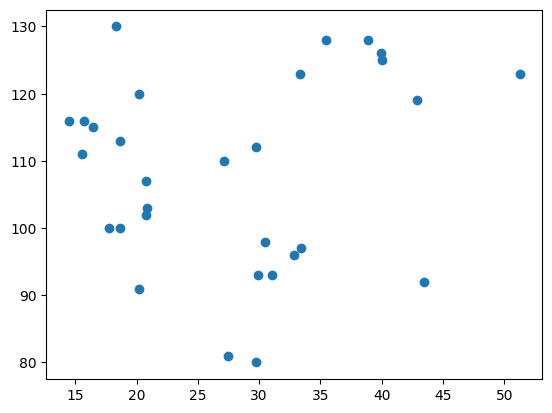

In [73]:
# Show how line was calculated
plt.scatter(X_test, y_test, color='g')